# HW1

In [110]:
#imports
import pandas as pd

In [111]:
#read data 
df = pd.read_csv('penguins.csv', header=None, names=['island', 'bill_length_mm', 'bill_depth_mm','flipper','body_mass_g','sex','species'])


## Q1
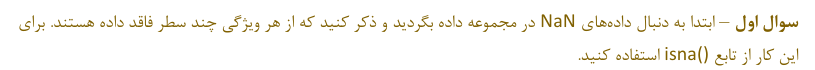


In [112]:
nan_values=df.isna()
# check for count
nan_values.sum()

island             0
bill_length_mm     2
bill_depth_mm      2
flipper            2
body_mass_g        2
sex               11
species            0
dtype: int64

## Q2
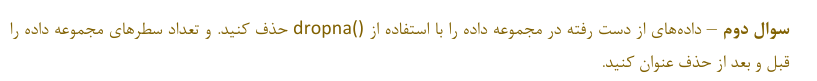

In [113]:
# rows before delete
row_count_before=df.shape[0]
print(row_count_before)
# drop nan values
df_without_nan=df.dropna()
row_count_after=df_without_nan.shape[0]
print(row_count_after)

344
333


## Q3
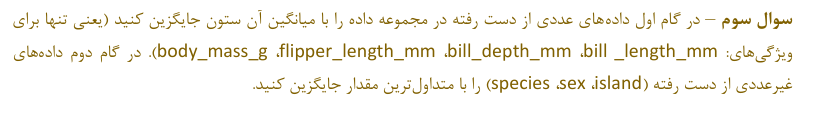


In [114]:
# replace non-bolean values with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
replaced_df_nboolean=df.copy(deep=True)
nboolean_columns=['bill_length_mm', 'bill_depth_mm','flipper','body_mass_g']
imputer.fit(replaced_df_nboolean[nboolean_columns])
replaced_df_nboolean[nboolean_columns] = pd.DataFrame(imputer.transform(replaced_df_nboolean[nboolean_columns]))
replaced_df_nboolean


,island,bill_length_mm,bill_depth_mm,flipper,body_mass_g,sex,species
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,Adelie
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,Adelie
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,Adelie
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,Adelie
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,Adelie
...,...,...,...,...,...,...,...
339,Dream,55.80000,19.80000,207.000000,4000.000000,male,Chinstrap
340,Dream,43.50000,18.10000,202.000000,3400.000000,female,Chinstrap
341,Dream,49.60000,18.20000,193.000000,3775.000000,male,Chinstrap
342,Dream,50.80000,19.00000,210.000000,4100.000000,male,Chinstrap


In [115]:
# now for boolean values
boolean_cols= ['sex','species','island']
imputer = SimpleImputer(strategy='most_frequent')
replaced_df_nboolean[boolean_cols]=imputer.fit_transform(replaced_df_nboolean[boolean_cols])
replaced_df=replaced_df_nboolean
df=replaced_df
replaced_df

,island,bill_length_mm,bill_depth_mm,flipper,body_mass_g,sex,species
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,Adelie
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,Adelie
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,Adelie
3,Torgersen,43.92193,17.15117,200.915205,4201.754386,male,Adelie
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,Adelie
...,...,...,...,...,...,...,...
339,Dream,55.80000,19.80000,207.000000,4000.000000,male,Chinstrap
340,Dream,43.50000,18.10000,202.000000,3400.000000,female,Chinstrap
341,Dream,49.60000,18.20000,193.000000,3775.000000,male,Chinstrap
342,Dream,50.80000,19.00000,210.000000,4100.000000,male,Chinstrap


## Q4
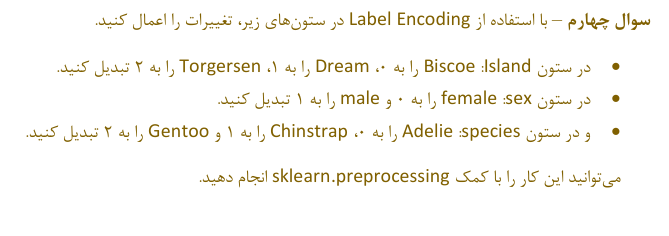

In [116]:
#import then convert
from sklearn.preprocessing import LabelEncoder
new_df=df.copy(deep=True)
le = LabelEncoder()
new_df['island']=le.fit_transform(new_df['island'])
new_df['sex']=le.fit_transform(new_df['sex'])
new_df['species']=le.fit_transform(new_df['species'])
df=new_df
new_df

,island,bill_length_mm,bill_depth_mm,flipper,body_mass_g,sex,species
0,2,39.10000,18.70000,181.000000,3750.000000,1,0
1,2,39.50000,17.40000,186.000000,3800.000000,0,0
2,2,40.30000,18.00000,195.000000,3250.000000,0,0
3,2,43.92193,17.15117,200.915205,4201.754386,1,0
4,2,36.70000,19.30000,193.000000,3450.000000,0,0
...,...,...,...,...,...,...,...
339,1,55.80000,19.80000,207.000000,4000.000000,1,1
340,1,43.50000,18.10000,202.000000,3400.000000,0,1
341,1,49.60000,18.20000,193.000000,3775.000000,1,1
342,1,50.80000,19.00000,210.000000,4100.000000,1,1


## Q5 
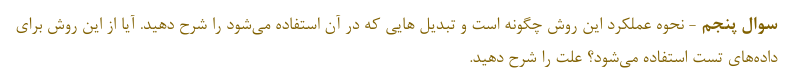

## answer
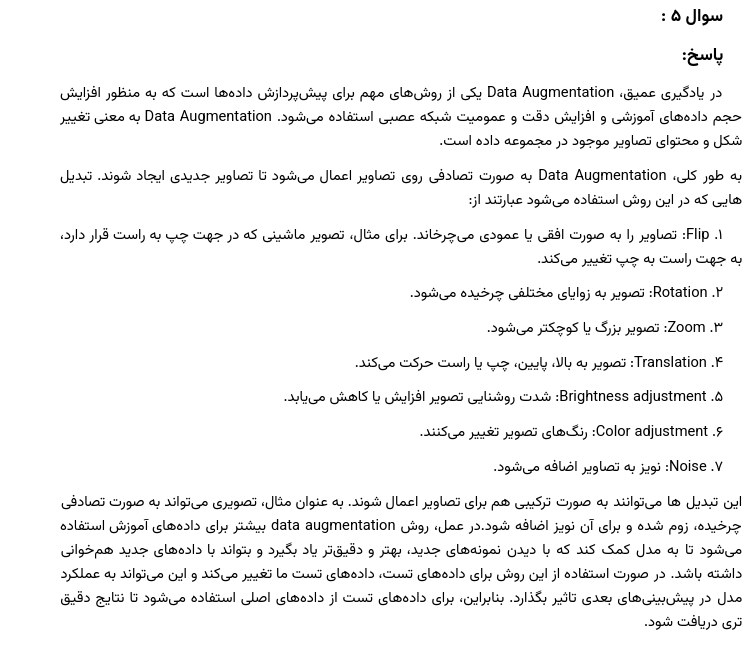

## Q6
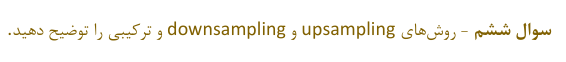

## answer

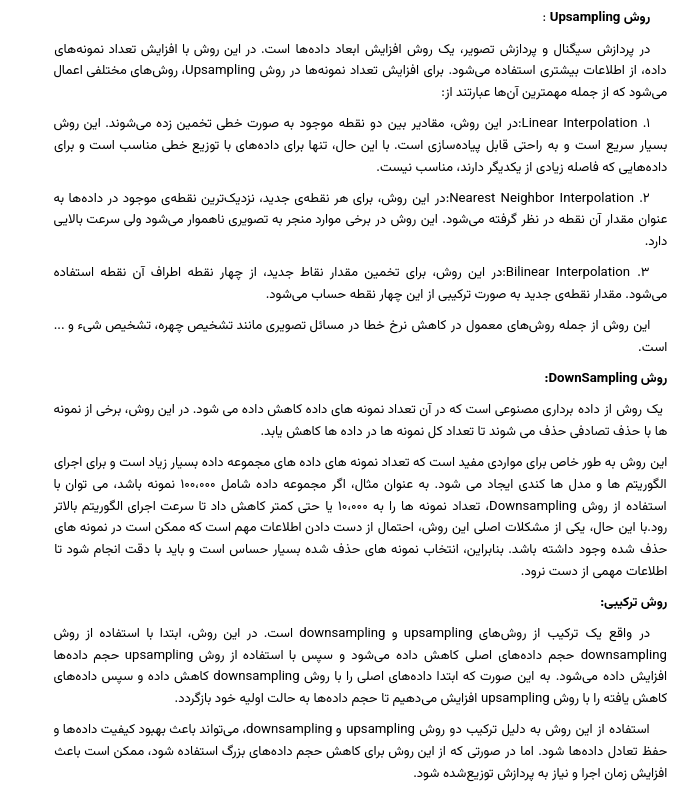

## Q7
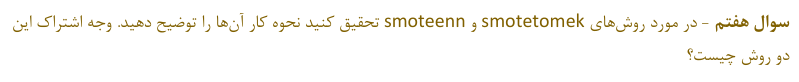


## answer 
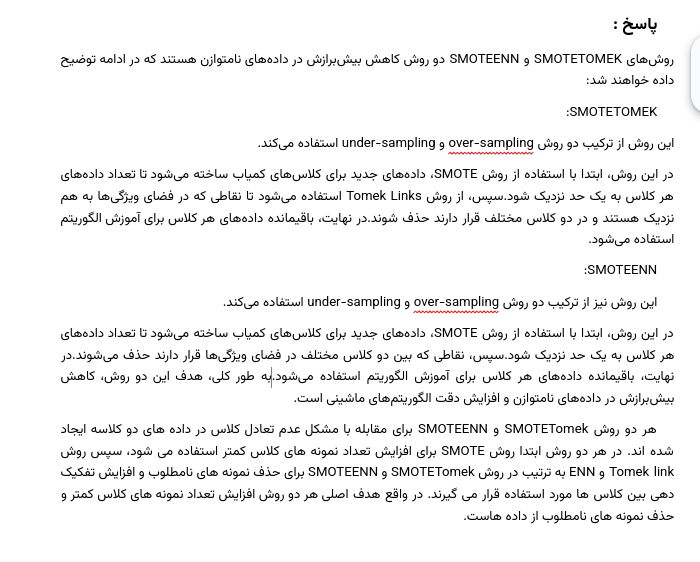

## Q8
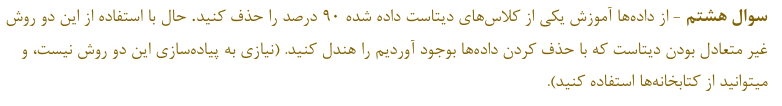

In [125]:
# import new package
from imblearn.combine import SMOTEENN,SMOTETomek
#remove from dataset
new_9=df.sample(frac=0.9,random_state=1)
new=df.drop(new_9.index)


smt = SMOTETomek()

# ایجاد شی SMOTEENN
sme = SMOTEENN()

# تعادل داده ها با روش SMOTETomek
X_res1, y_res1 = smt.fit_resample(new.drop('island', axis=1), new['island'])

# تعادل داده ها با روش SMOTEENN
X_res2, y_res2 = sme.fit_resample(new.drop('island', axis=1), new['island'])
X_res1


,bill_length_mm,bill_depth_mm,flipper,body_mass_g,sex,species
0,39.500000,17.400000,186.000000,3800.000000,0,0
1,39.600000,17.700000,186.000000,3500.000000,0,0
2,39.700000,18.400000,190.000000,3900.000000,1,0
3,42.700000,18.300000,196.000000,4075.000000,1,0
4,44.100000,18.000000,210.000000,4000.000000,1,0
5,37.500000,18.500000,199.000000,4475.000000,1,0
6,40.600000,17.200000,187.000000,3475.000000,1,0
7,47.600000,14.500000,215.000000,5400.000000,1,2
8,44.500000,14.300000,216.000000,4100.000000,1,2
9,48.500000,14.100000,220.000000,5300.000000,1,2


In [126]:
y_res1

0     2
1     0
2     2
3     0
4     2
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
Name: island, dtype: int64

In [127]:
X_res2


,bill_length_mm,bill_depth_mm,flipper,body_mass_g,sex,species
0,47.6,14.5,215.0,5400.0,1,2
1,48.5,14.1,220.0,5300.0,1,2
2,54.3,15.7,231.0,5650.0,1,2
3,50.0,15.9,224.0,5350.0,1,2
4,50.8,17.3,228.0,5600.0,1,2
5,52.1,17.0,230.0,5550.0,1,2
6,49.1,15.0,228.0,5500.0,1,2


In [128]:
y_res2

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: island, dtype: int64

## Q9 
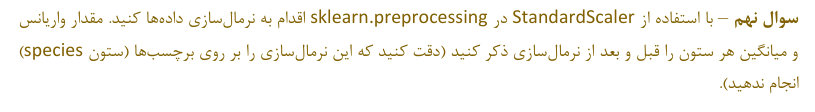

In [150]:
# import lib
from sklearn.preprocessing import StandardScaler
columns=['bill_length_mm', 'bill_depth_mm','flipper','body_mass_g','sex','island']
selected_cols=df[columns]
# mean befor normalize 
print("Mean: ")
print("-"*20)
print(df.mean())
# var before normilize
print("-"*20)
print("var: ")
print("-"*20)
print(df.var())
# normilize 
scaler = StandardScaler()
df[columns] = scaler.fit_transform(selected_cols)
print("-"*20)
print("Mean: ")
print("-"*20)
print(df.mean())
# var before normilize
print("-"*20)
print("var: ")
print(df.var())
print("-"*20)


Mean: 
--------------------
island            8.262125e-17
bill_length_mm   -1.156697e-15
bill_depth_mm     4.131062e-16
flipper          -8.262125e-16
body_mass_g       8.262125e-17
sex              -6.454785e-18
species           9.186047e-01
dtype: float64
--------------------
var: 
--------------------
island            1.002915
bill_length_mm    1.002915
bill_depth_mm     1.002915
flipper           1.002915
body_mass_g       1.002915
sex               1.002915
species           0.798020
dtype: float64
--------------------
Mean: 
--------------------
island            4.131062e-17
bill_length_mm    0.000000e+00
bill_depth_mm    -4.131062e-17
flipper           4.131062e-17
body_mass_g       0.000000e+00
sex              -2.711010e-17
species           9.186047e-01
dtype: float64
--------------------
var: 
island            1.002915
bill_length_mm    1.002915
bill_depth_mm     1.002915
flipper           1.002915
body_mass_g       1.002915
sex               1.002915
species           

## Q10
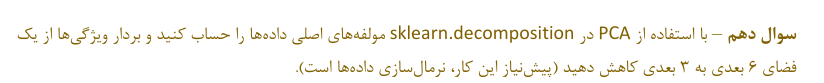

,island,bill_length_mm,bill_depth_mm,flipper,body_mass_g,sex,species
0,1.844076,-8.870812e-01,7.877425e-01,-1.422488e+00,-5.657892e-01,0.960098,0
1,1.844076,-8.134940e-01,1.265563e-01,-1.065352e+00,-5.031679e-01,-1.041561,0
2,1.844076,-6.663195e-01,4.317192e-01,-4.225067e-01,-1.192003e+00,-1.041561,0
3,1.844076,-1.504744e-16,-4.131062e-16,8.262125e-16,-8.262125e-17,0.960098,0
4,1.844076,-1.328605e+00,1.092905e+00,-5.653611e-01,-9.415172e-01,-1.041561,0
...,...,...,...,...,...,...,...
339,0.465028,2.185186e+00,1.347208e+00,4.346200e-01,-2.526826e-01,0.960098,1
340,0.465028,-7.762162e-02,4.825797e-01,7.748392e-02,-1.004139e+00,-1.041561,1
341,0.465028,1.044584e+00,5.334401e-01,-5.653611e-01,-5.344785e-01,0.960098,1
342,0.465028,1.265345e+00,9.403239e-01,6.489017e-01,-1.274399e-01,0.960098,1
